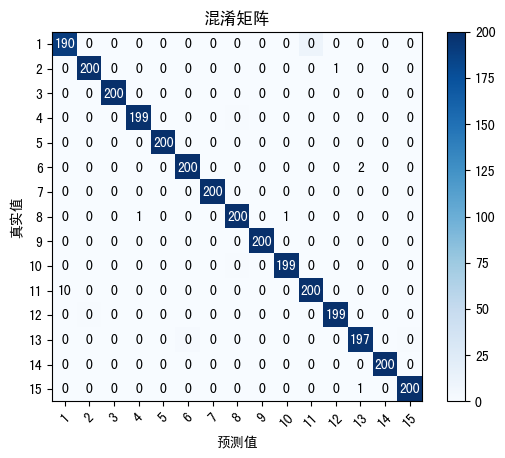

准确率:99.47%
精确率:1:95.0%
精确率:2:100.0%
精确率:3:100.0%
精确率:4:99.5%
精确率:5:100.0%
精确率:6:100.0%
精确率:7:100.0%
精确率:8:100.0%
精确率:9:100.0%
精确率:10:99.5%
精确率:11:100.0%
精确率:12:99.5%
精确率:13:98.5%
精确率:14:100.0%
精确率:15:100.0%
召回率:1:100.0%
召回率:2:99.5%
召回率:3:100.0%
召回率:4:100.0%
召回率:5:100.0%
召回率:6:99.01%
召回率:7:100.0%
召回率:8:99.01%
召回率:9:100.0%
召回率:10:100.0%
召回率:11:95.24%
召回率:12:100.0%
召回率:13:100.0%
召回率:14:100.0%
召回率:15:99.5%


In [1]:
# coding=utf-8
import matplotlib.pyplot as plt
import numpy as np

confusion = np.array(([190,0,0,0,0,0,0,0,0,0,10,0,0,0,0],
                      [0,200,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0,0,200,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,199,0,0,0,1,0,0,0,0,0,0,0],
                      [0,0,0,0,200,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,200,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,200,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,200,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,200,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,1,0,199,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,200,0,0,0,0],
                      [0,1,0,0,0,0,0,0,0,0,0,199,0,0,0],
                      [0,0,0,0,0,2,0,0,0,0,0,0,197,0,1],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,200,0],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,200]
                      ))
classes=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15']
#画出混淆矩阵
def confusion_matrix(confMatrix):
    # 热度图，后面是指定的颜色块，可设置其他的不同颜色
    plt.imshow(confMatrix, cmap=plt.cm.Blues)
    # ticks 坐标轴的坐标点
    # label 坐标轴标签说明
    indices = range(len(confMatrix))
    # 第一个是迭代对象，表示坐标的显示顺序，第二个参数是坐标轴显示列表
    # plt.xticks(indices, [0, 1, 2])
    # plt.yticks(indices, [0, 1, 2])
    plt.xticks(indices, classes,rotation=45)
    plt.yticks(indices, classes)

    plt.colorbar()

    plt.xlabel('预测值')
    plt.ylabel('真实值')
    plt.title('混淆矩阵')

    # plt.rcParams两行是用于解决标签不能显示汉字的问题
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False

    # 显示数据
    for first_index in range(len(confMatrix)):  # 第几行
        for second_index in range(len(confMatrix[first_index])):  # 第几列
            if first_index==second_index:
                plt.text(first_index, second_index, confMatrix[first_index][second_index],va='center',ha='center',color='white')
            else:
                plt.text(first_index, second_index, confMatrix[first_index][second_index], va='center', ha='center')
    # 在matlab里面可以对矩阵直接imagesc(confusion)
    # 显示
    plt.show()


#计算准确率
def calculate_all_prediction(confMatrix):
    '''
    计算总精度,对角线上所有值除以总数
    :return:
    '''
    total_sum=confMatrix.sum()
    correct_sum=(np.diag(confMatrix)).sum()
    prediction=round(100*float(correct_sum)/float(total_sum),2)
    print('准确率:'+str(prediction)+'%')

def calculae_lable_prediction(confMatrix):
    '''
    计算每一个类别的预测精度:该类被预测正确的数除以该类的总数
    '''
    l=len(confMatrix)
    for i in range(l):
        label_total_sum = confMatrix.sum(axis=1)[i]
        label_correct_sum=confMatrix[i][i]
        prediction = round(100 * float(label_correct_sum) / float(label_total_sum), 2)
        print('精确率:'+classes[i]+":"+str(prediction)+'%')

def calculate_label_recall(confMatrix):
    l = len(confMatrix)
    for i in range(l):
        label_total_sum = confMatrix.sum(axis=0)[i]
        label_correct_sum = confMatrix[i][i]
        prediction = round(100 * float(label_correct_sum) / float(label_total_sum), 2)
        print('召回率:'+classes[i] + ":" + str(prediction) + '%')


confusion_matrix(confusion)
calculate_all_prediction(confusion)
calculae_lable_prediction(confusion)
calculate_label_recall(confusion)
